In [2]:
import nibabel as nib
import numpy as np
import os
import pandas as pd
from nilearn.image import resample_to_img, resample_img
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Dataset 1

In [3]:
def get_image_metadata(img):
    shape = img.shape
    xd, yd, zd = shape[0], shape[1], shape[2]
    zooms = img.header.get_zooms()
    dx, dy, dz = zooms[0], zooms[1], zooms[2]
    data = img.get_fdata()
    axcodes = nib.aff2axcodes(img.affine)
    
    return {
        'shape': (xd, yd, zd),
        'zooms': (dx, dy, dz),
        'data_type': img.get_data_dtype(),
        'orientation': axcodes,
        'mean_pixel': np.nanmean(data),
        'min_pixel': np.nanmin(data),
        'max_pixel': np.nanmax(data),
        # 'data': data
    }

In [5]:
base_dir = "/home/cerebriu/data/datasets/raw/MOMENI/data/PublicDataShare_2020/rCMB_DefiniteSubject/"
ims = os.listdir(base_dir)

all_metadta = []
for im in ims:
    metadata_temp = get_image_metadata(nib.load(os.path.join(base_dir, im)))
    all_metadta.append(metadata_temp)
    
data = pd.DataFrame(all_metadta)

In [6]:
data

,shape,zooms,data_type,orientation,mean_pixel,min_pixel,max_pixel
0,"(176, 256, 80)","(0.93749994, 0.9375, 1.7499969)",float32,"(L, P, S)",118.248174,0.0,2325.942139
1,"(176, 256, 80)","(0.9375, 0.9375, 1.7500031)",float32,"(L, P, S)",112.620013,0.0,2325.942139
2,"(176, 256, 80)","(0.93750006, 0.9375, 1.7499955)",float32,"(L, P, S)",123.122132,0.0,2325.942139
3,"(176, 256, 80)","(0.93749994, 0.9375, 1.7499994)",float32,"(L, P, S)",136.849049,0.0,2325.942139
4,"(176, 256, 80)","(0.93750006, 0.9375, 1.7500014)",float32,"(L, P, S)",136.903668,0.0,2325.942139
5,"(176, 256, 80)","(0.9375001, 0.93750006, 1.75)",float32,"(L, P, S)",152.878387,0.0,2324.042969
6,"(176, 256, 80)","(0.9375, 0.93750006, 1.7499994)",float32,"(L, P, S)",156.722955,0.0,2325.942139
7,"(176, 256, 80)","(0.93749994, 0.9375, 1.749998)",float32,"(L, P, S)",118.115786,0.0,2325.942139
8,"(176, 256, 80)","(0.93749994, 0.9375, 1.7499998)",float32,"(L, P, S)",126.540811,0.0,2325.942139
9,"(176, 256, 80)","(0.93749994, 0.93750006, 1.7499985)",float32,"(L, P, S)",134.733751,0.0,2325.942139


In [ ]:
# idx=7
# im1 = nib.load(os.path.join(base_dir, ims[idx])).get_fdata()
# print(ims[idx])

# mappings = pd.read_excel("/home/cerebriu/data/datasets/PublicDataShare_2020/rCMBInformationInfo.xlsx").reset_index()
# # print(mappings.columns)
# def get_coords(df, filename):
#     # Filter the DataFrame for the row that matches the filename
#     df_filtered = df[df[df.columns[1]] == filename]

#     # Extract x, y, z coordinates from columns 2, 3, and 4 respectively
#     x = df_filtered.iloc[0, 2]  # Adjust the index if the column numbering is different
#     y = df_filtered.iloc[0, 3]
#     z = df_filtered.iloc[0, 4]

#     return x, y, z


# cmb1 = get_coords(mappings, ims[idx])

# # Create a mask of the same size as the image, initialized to zero
# mask = np.zeros_like(im1)

# # Mark the CMB and its surrounding voxels in the mask
# radius = 3  # Radius of the area to highlight around the CMB
# for dx in range(-radius, radius + 1):
#     for dy in range(-radius, radius + 1):
#         if 0 <= cmb1[0] + dx < mask.shape[0] and 0 <= cmb1[1] + dy < mask.shape[1]:
#             mask[cmb1[0] + dx, cmb1[1] + dy, cmb1[2]] = 1


# fig, axs = plt.subplots()

# # Plot the image
# axs.imshow(im1[:, :, cmb1[2]], cmap='gray')

# # Overlay the mask
# axs.imshow(mask[:, :, cmb1[2]], cmap='Reds', alpha=0.5)

# axs.set_title('SWI with CMB Highlighted')
# plt.show()

In [ ]:
# data

# Dataset 2

In [ ]:
base_dir = "/home/cerebriu/data/datasets/raw/DOU/nii/"
label_dir = "/home/cerebriu/data/datasets/raw/DOU/ground_truth/"
ims = os.listdir(base_dir)

all_metadta = []
for im in ims:
    metadata_temp = get_image_metadata(nib.load(os.path.join(base_dir, im)))
    all_metadta.append(metadata_temp)
    
data = pd.DataFrame(all_metadta)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Apr 27 11:31:25 2015', '__version__': '1.0', '__globals__': [], 'cen': array([[310, 300,  71],
       [270, 263,  72],
       [207, 287,  72],
       [340, 332,  74],
       [305, 247,  84],
       [212, 267,  84],
       [316, 269,  83],
       [164, 262, 104]], dtype=uint16), 'gt_num': array([[8]], dtype=uint8)}
[212 267  84]
(512, 512, 150)


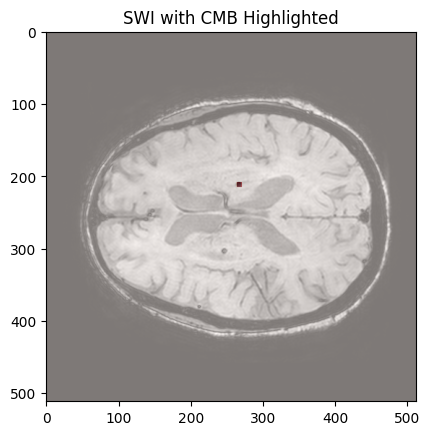

In [ ]:
idx=1
im1 = nib.load(os.path.join(base_dir, ims[idx])).get_fdata()

mat_file = loadmat(os.path.join(label_dir, ims[idx].split(".")[0] + ".mat"))

print(mat_file)
cmb1 = mat_file['cen'][5]
print(cmb1)
print(im1.shape)


# Create a mask of the same size as the image, initialized to zero
mask = np.zeros_like(im1)

# Mark the CMB and its surrounding voxels in the mask
radius = 3  # Radius of the area to highlight around the CMB
for dx in range(-radius, radius + 1):
    for dy in range(-radius, radius + 1):
        if 0 <= cmb1[0] + dx < mask.shape[0] and 0 <= cmb1[1] + dy < mask.shape[1]:
            mask[cmb1[0] + dx, cmb1[1] + dy, cmb1[2]] = 1


fig, axs = plt.subplots()

# Plot the image
axs.imshow(im1[:, :, cmb1[2]], cmap='gray')

# Overlay the mask
axs.imshow(mask[:, :, cmb1[2]], cmap='Reds', alpha=0.5)

axs.set_title('SWI with CMB Highlighted')
plt.show()

In [ ]:
data

,shape,zooms,data_type,orientation,mean_pixel,min_pixel,max_pixel
0,"(512, 512, 150)","(0.44921875, 0.44921875, 0.99998474)",float64,"(L, P, S)",0.464552,0.0,4.258120
1,"(512, 512, 150)","(0.44921875, 0.44921875, 1.0000076)",float64,"(L, P, S)",0.458862,0.0,4.091575
2,"(343, 409, 147)","(0.44921875, 0.44921875, 0.9999928)",float64,"(R, A, S)",0.811636,0.0,4.276190
3,"(512, 512, 150)","(0.44921875, 0.44921875, 0.9999809)",float64,"(L, P, S)",0.506045,0.0,4.527961
4,"(357, 407, 141)","(0.44921875, 0.44921875, 1.0000021)",float64,"(R, A, S)",0.923717,0.0,4.566056
5,"(512, 512, 150)","(0.44921875, 0.44921875, 0.99993277)",float64,"(L, P, S)",0.549939,0.0,4.629304
6,"(512, 512, 150)","(0.44921875, 0.44921875, 0.9999542)",float64,"(L, P, S)",0.481207,0.0,4.266422
7,"(512, 512, 150)","(0.44921875, 0.44921875, 1.0000038)",float64,"(L, P, S)",0.456381,0.0,4.044689
8,"(512, 512, 150)","(0.44921875, 0.44921875, 0.99996185)",float64,"(L, P, S)",0.396538,0.0,4.014408
9,"(368, 416, 147)","(0.44921875, 0.44921875, 0.99999744)",float64,"(R, A, S)",0.665407,0.0,3.639072


In [ ]:
# idx = 0
# im1 = nib.load(os.path.join(base_dir, ims[idx]))
# print(
#     get_image_metadata(nib.load(os.path.join(base_dir, ims[idx])))
# )
# isotropic_affine = np.diag([1, 1, 1])
# resampled_image = resample_img(im1, target_affine=isotropic_affine,
#                                 interpolation="linear",
#                                 fill_value=np.min(im1.get_fdata()),
#                                 order='F')
# print(
#     get_image_metadata(resampled_image)
# )
# isotropic_affine = np.diag([0.5, 0.5, 0.5])
# resampled_image = resample_img(im1, target_affine=isotropic_affine,
#                                 interpolation="linear",
#                                 fill_value=np.min(im1.get_fdata()),
#                                 order='F')
# print(
#     get_image_metadata(resampled_image)
# )